In [108]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib import pyplot
import sympy as sp
from scipy import interpolate
from scipy.optimize import minimize
import scipy.optimize as opt
import math
import scipy.integrate as integrate
from scipy.optimize import curve_fit

**SAMUEL GIRALDO BUILES - 1020495309**

**NUMERAL A**

In [96]:
df = pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json")

Text(0.5, 1.0, 'Interpolacion')

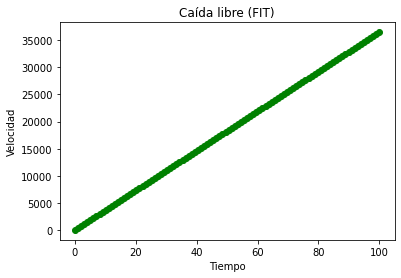

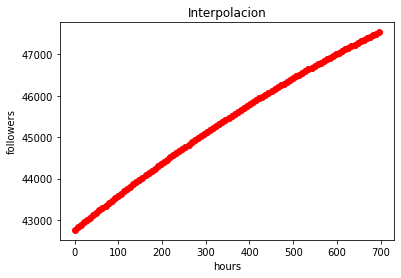

In [115]:
#FIT
def caida(a0,v0,t):
  return v0 + a0*t
v = df["followers"]/df["hours"]

res, cov = curve_fit(caida , df["hours"][1:], v[1:] ) # "res" nos da los valores para "v_i", y para "a_0"
x = np.linspace(0 , 100, 100)
plt.figure()
plt.plot(x,caida(3.64931416e+02,-2.65753530e-02,x),"go")
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.title('Caída libre (FIT)')

#NUMERAL 1

v_i = res[0] #Velocidad inicial [followers/hour]

#NUMERAL 2

a_0 = res[1] # Aceleración constante [followers/hour^2]

#NUMERAL 3
#Para calcular la cantidad máxima de followers primero debemos calcular "x", y para ello primero interpolaremos "followers",luego sacaremos su máximo
H = np.polynomial.hermite.Hermite.fit(df["hours"],df["followers"],2) #Hermite Interpolation
#Graficando la interpolacion para ver como ser comporta
x = np.linspace(df["hours"][0] , df["hours"][-1:] , 100)
plt.figure()
plt.plot(x, H(x), "ro")
plt.xlabel('hours')
plt.ylabel('followers')
plt.title('Interpolacion')

El máximo de seguidores sería: 50262.13672786526 ,su parte entera sería: 50262.0


Text(0.5, 1.0, 'Aumento para ver la hora en la que se alcanza el máximo')

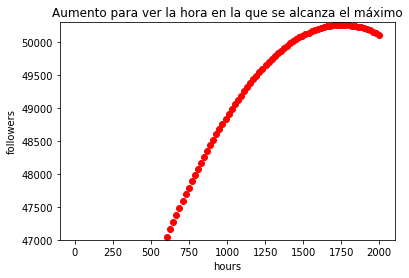

In [116]:
#Ahora calculemos su máximo
maximo = optimize.minimize(-H,2)
maximo = abs(maximo.fun)
print("El máximo de seguidores sería:", maximo,",su parte entera sería:",maximo//1)

#Numeral 4
#Miremos la grafica en el maximo
x = np.linspace(df["hours"][0] , 2000, 100)
plt.plot(x, H(x), "ro")
plt.grid
plt.ylim(47000,50300)
plt.xlabel('hours')
plt.ylabel('followers')
plt.title('Aumento para ver la hora en la que se alcanza el máximo')

In [84]:
#Vemos que es aproximadamente en la hora 1750
dia = 1750/24 # Estas horas en días
#Así a la fecha cero (2021/08/04) le sumamos aproximadamente 73 días
#La fecha sería (2021/10/16)


72.91666666666667

**NUMERAL B**

[1.5707963267948966, 1.5708262331648322, 1.570915959771527, 1.5710655200080292, 1.5712749524890401, 1.5715442970721103, 1.5718736111058933, 1.5722629626287306, 1.572712434941228, 1.5732221219133953, 1.5737921307928342, 1.5744225816605408, 1.57511360750356, 1.5758653542956291, 1.5766779810859142, 1.5775516607762854, 1.5784865777048471, 1.579482931283389, 1.5805409339210672, 1.5816608116720685, 1.5828428043756602, 1.5840871658053677, 1.5853941638274833, 1.5867640805691152, 1.588197212596002, 1.5896938711003374, 1.591254382098856, 1.5928790866414546, 1.5945683410306386, 1.5963225170520954, 1.5981420022167203, 1.6000272000144407, 1.6019785301801885, 1.6039964289724227, 1.6060813494645847, 1.6082337618499298, 1.6104541537601784, 1.6127430305984605, 1.6151009158870575, 1.617528351630477, 1.6200258986944045, 1.622594137201135, 1.6252336669420997, 1.627945107808143, 1.6307291002382447, 1.6335863056874114, 1.6365174071145179, 1.6395231094908973, 1.6426041403305478, 1.6457612502428587, 1.6489952

Text(0.5, 1.0, 'T/To en funcion de Alpha(Grados)')

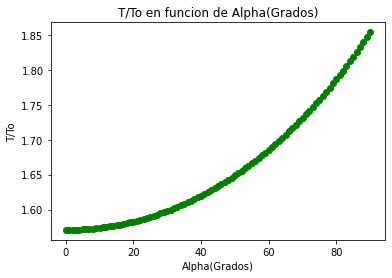

In [102]:
#Numeral 1
n = 0 #Variación del ángulo en grados
rad = [] #Lista de angulos en radianes
ang = [] #Lista de angulos en radianes
t = [] #Lista de los valores de T/To
while n <= 90:
  a = math.radians(n)
  func = lambda phi: 1/((1 - (np.sin(a/2)**2)*(np.sin(phi)**2))**(1/2))
  integral = integrate.quadrature(func,0,np.pi/2)
  T_To = 4*integral #T/To
  rad.append(a) #Añadiendo valores a la lista de angulos en radianes
  ang.append(n) #Anadiendo valores a la lista de angulos en grados
  t.append(T_To[0]) # [0] Para que no tome el error de la integral
  n = n+1
print(t) # RESPUESTA AL NUMERAL 1
#Numeral 2
pf = pd.DataFrame({"T/To":t , "Angulo(Grados)":ang, "Angulo(Radianes)":rad})
#Numeral 3
plt.figure()
plt.plot(pf["Angulo(Grados)"],pf["T/To"], "go")
plt.xlabel('Alpha(Grados)')
plt.ylabel('T/To')
plt.title('T/To en funcion de Alpha(Grados)')
#Numeral 4; no comprendo muy bien a que se refiere

In [100]:
a

Hermite([nan, nan, nan], domain=[  0.      , 696.888245], window=[-1.,  1.])